**Kernel Trick**

Kernel trick is a method by which linear data is taken to projected into a polynomial space. For example, if you had a class of data surrounded by another class, you could transform the central class to a polynomial space to seperate the classes.

The main point of kernel trick is that it uses the differences between values. When it is training, it looks at the differences in examples within the training data. It is a bit like a roided up version of KNN. 

When using the test data, it is working out the difference between the test data, and the data which it has been trained on.

In [3]:
import numpy as np
import scipy.stats as st
import math
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt


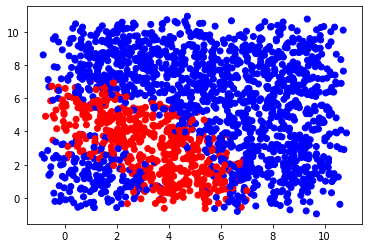

2000
2000
[-1.  1. -1. ... -1. -1. -1.]


<Figure size 432x288 with 0 Axes>

In [28]:
n=2000
small_rad = 10
big_rad = 40
def generate_data():
    data_points = np.random.rand(n,2)*10
    y = np.zeros((n))
    #print(y)
    for i, d in enumerate(data_points):
        a = d[0]**2+d[1]**2
        if a>small_rad:
            if a<big_rad:
                y[i]=1
            else:
                y[i]=-1
        else:
            y[i]=-1
    data_points += np.random.rand(n,2)*2-1 #add some noise
    plt.scatter([d[0] for d in data_points], [d[1] for d in data_points], color = ['r' if i==1 else 'b' for i in y])
    plt.show()
    plt.clf()
    return data_points, y

X, Y = generate_data()
print(len(Y))
print(len(X))
X_train, X_test = X[:int(0.8*len(X)),:], X[int(0.8*len(X)):,:]
Y_train, Y_test = Y[:int(0.8*len(Y))], Y[int(0.8*len(Y)):]
print(Y_train)

In [22]:
"""
This notebook will show how to generate a prediction for a dataset 
using Kernel trick with a Gaussian Kernel.
"""
# Training and Test Data
train_mean = np.mean(X_train)
train_std = np.std(X_train)
vectorized_centring = np.vectorize(lambda i: (i-train_mean)/train_std)
cented_X_train = vectorized_centring(X_train)
cented_X_test = vectorized_centring(X_test)

In [30]:
# This is the method which uses a gaussian kernel
def gaussian(xi, xj):
    """This function will implement gaussian kernel"""
    diff = np.subtract(xi, xj)
    norm = np.linalg.norm(diff, ord=2)
    exponent = np.power(norm, 2) *0.5
    return np.exp(exponent)

def kernel_trick(X1, X2, k):
    """
    This function will use a defined kernel and will set every index 
    of a K matrix. This matrix can be used to calculate weightings for 
    a prediction. The Matrix will be a NxN matrix of values where N is 
    the size of X. When calculating K, X1 = X2. When calculating test 
    data, X1 is the test data and X2 is the training data.
    """
    K = []
    for i in range(0, len(X1)):
        K.append([])
        for j in range(0, len(X2)):
            K[i].append(k(X1[i], X2[j]))
    return K
# Create the K matrix for training data (K)
K_train = np.asarray(kernel_trick(cented_X_train, cented_X_train, gaussian))
print("\nK: {}".format(K_train))

# Generate the weightings for the prediction
U = np.matmul(np.linalg.inv(K_train), Y_train)
print("\nU: {}".format(U))

# Generate the value of ~K, used for predicting labels of test data
K_test = np.asarray(kernel_trick(cented_X_test, cented_X_train, gaussian))
print("\n~K: {}".format(K_test))

# Using the test data and weightings to predict the test labels
predictions = np.sign(np.matmul(K_test, U))
print("\nPredictions: {}".format(predictions))
predictions[predictions>=0] = 1
predictions[predictions<=0] = -1
a = predictions-Y_test
accuracy = 1 - np.linalg.norm(a, ord=0)/n
accuracy


K: [[ 1.          9.53225492  1.11258247 ...  7.01503292  5.24789251
   4.16679095]
 [ 9.53225492  1.         27.5200543  ...  2.81692157  1.37611101
   1.14649445]
 [ 1.11258247 27.5200543   1.         ... 17.54005695 13.42590217
  10.09018854]
 ...
 [ 7.01503292  2.81692157 17.54005695 ...  1.          1.23683151
   1.73339202]
 [ 5.24789251  1.37611101 13.42590217 ...  1.23683151  1.
   1.08945045]
 [ 4.16679095  1.14649445 10.09018854 ...  1.73339202  1.08945045
   1.        ]]

U: [-2.14365826e+14  1.93635249e+13 -2.35563510e+13 ... -6.35562686e+14
 -7.40077183e+12  1.87313654e+14]

~K: [[ 11.66932597  54.59329246  19.13416793 ...   2.92103978   7.95491221
   15.7429636 ]
 [  7.9448461   22.70459562  14.09345919 ...   1.90861894   4.28568962
    7.73399999]
 [170.06774055   4.19418463 788.75918957 ...   2.4502671    2.73064772
    4.38456649]
 ...
 [  2.02944775  85.5435125    1.82994476 ...  11.65885011  18.23063471
   21.20363123]
 [  2.1791869  234.38199785   1.53412245 ...  4

0.9085

In [31]:
# Another way to do it, is purely through matrix multiplication
"""
Change of basis from linear space to polynomial space for both training
and test data

X = [[A, B], [C, D]]

Z = [[1, A, B, A^2, AB, B^2], [1, C, D, C^2, CD, D^2]]
"""

poly = PolynomialFeatures(2)
Z_train = poly.fit_transform(cented_X_train)
print("\nZ: {}".format(Z_train))
Z_test = poly.fit_transform(cented_X_test)
print("\n~Z: {}".format(Z_test))

# Use these Z matricies to build a K matrix and a ~K matrix

K_train = np.matmul(Z_train, np.transpose(Z_train))
print("\nK: {}".format(K_train))
K_test = np.matmul(Z_test, np.transpose(Z_train))
print("\n~K: {}".format(K_test))

# Calculate regression weights

U = np.matmul(np.linalg.inv(K_train), Y_train)
print("\nU: {}".format(U))

# Calculate predictions
predictions = np.sign(np.matmul(K_test, U))
print("\nPredictions: {}".format(predictions))
predictions[predictions>=0] = 1
predictions[predictions<=0] = -1
a = predictions-Y_test
accuracy = 1 - np.linalg.norm(a, ord=0)/n
accuracy


Z: [[ 1.00000000e+00  5.39108035e-03  1.39976096e+00  2.90637474e-05
   7.54622380e-03  1.95933074e+00]
 [ 1.00000000e+00 -1.73277252e+00  1.79863463e-01  3.00250061e+00
  -3.11662466e-01  3.23508652e-02]
 [ 1.00000000e+00  3.10725116e-01  1.74637148e+00  9.65500976e-02
   5.42641481e-01  3.04981336e+00]
 ...
 [ 1.00000000e+00 -4.72621599e-01 -5.15340787e-01  2.23371176e-01
   2.43561186e-01  2.65576126e-01]
 [ 1.00000000e+00 -9.93255942e-01 -1.22854313e-01  9.86557367e-01
   1.22025776e-01  1.50931822e-02]
 [ 1.00000000e+00 -1.21214356e+00  2.28478852e-01  1.46929201e+00
  -2.76949169e-01  5.22025860e-02]]

~Z: [[ 1.          0.98985319 -0.58638147  0.97980934 -0.58043156  0.34384322]
 [ 1.          0.66431863 -0.52659865  0.44131924 -0.34982929  0.27730614]
 [ 1.         -1.40040869 -1.48053775  1.96114451  2.07335794  2.19199204]
 ...
 [ 1.          1.1310442   1.0144916   1.27926098  1.14743484  1.0291932 ]
 [ 1.          1.22991915  1.64149357  1.51270112  2.01890437  2.69450113]